# Import Libraries

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# magic word for producing visualizations in notebook
%matplotlib inline

# Data Visualization

In [2]:
azdias = pd.read_csv('../capstone_data/Udacity_AZDIAS_052018.csv',low_memory=False)

In [3]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [4]:
azdias.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,798073.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,8.287263,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,15.628087,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,1.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,9.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,595.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


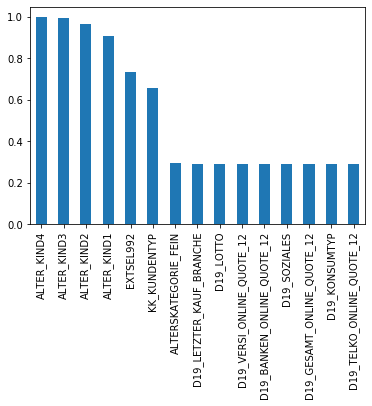

In [5]:
#Plotting the proportion of null values top 15 columns
(azdias.isnull().sum().sort_values(ascending=False)/azdias.shape[0])[:15].plot(kind='bar')

These values are not correct. Because, in the 'DIAS Attributes - Values 2017.xlsx' file, for columns certain values are unknown. For example, in the column AGER_TYP value -1 is said to be unknown. Similarly other columns have some values which are need to be mapped to NAN.

In [6]:
#Categorical columns
azdias.select_dtypes(include='object').head()

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,NaN,NaN,NaN,NaN,NaN,NaN
1,8A,8.0,51.0,NaN,1992-02-10 00:00:00,W
2,4C,4.0,24.0,D19_UNBEKANNT,1992-02-12 00:00:00,W
3,2A,2.0,12.0,D19_UNBEKANNT,1997-04-21 00:00:00,W
4,6B,6.0,43.0,D19_SCHUHE,1992-02-12 00:00:00,W


These categorical features have to be converted into numerical features. The columns 'CAMEO_DEUG_2015' and 'CAMEO_INTL_2015' are actually numerical but there some values in the columns which are 'XX' or 'X' that are to be replaced by NAN. The columns 'D19_LETZTER_KAUF_BRANCHE','EINGEFUEGT_AM','OST_WEST_KZ' can be dropped because they are too informative.

# Data Preprcocessing

In [7]:
def Attribute_Unknown_Dict(path,df):
    '''
    Purpose: Map all the attributes to their unknown values in a dictionary
    
    Input: PATH TO DIAS Attributes - Values 2017.xlsx file, in str format
    
    Output:
    new_dict:Dictionary with attributes as key and the unknown meaning values in a list
    '''
    #reading the xlsx file and storing it in a dataframe
    attributes=pd.read_excel(path,skiprows=1)
    
    #formatting
    attributes=attributes.drop(['Unnamed: 0'],axis=1,inplace=False)
    
    #Droping all the rows with nan values. Since, all the first values refer to the unknown meaning category\
    #Only keeping the first row for each attribute works
    attributes=attributes.dropna()
    
    new_dict={}
    for i in range(attributes.shape[0]):
        #checking if it corresponds to the unknown value
        if ('unknown' in attributes['Meaning'].iloc[i].split()) or(attributes['Meaning'].iloc[i] == 'no transaction known'):
            new_list=[]
            if type(attributes['Value'].iloc[i])==int:
                new_list.append(attributes['Value'].iloc[i])
            else:
                for j in attributes['Value'].iloc[i].split(','):
                    new_list.append(int(j))

            new_dict[attributes['Attribute'].iloc[i]]=new_list
    
    #These columns are not present in  the actual dataset
    new_dict.pop('BIP_FLAG')
    
    new_dict.pop('GEOSCORE_KLS7')
    new_dict.pop('HAUSHALTSSTRUKTUR')
    new_dict.pop('SOHO_FLAG')
    new_dict.pop('WACHSTUMSGEBIET_NB')
    
    
    #Removing name '_RZ' from the end of each column name
    for i in new_dict:
        if i not in df.columns:
            new_dict[i[:-3]]=new_dict.pop(i)
    
    #removing the last key_value pair
    new_dict.pop('')
    
    
    return new_dict

In [8]:
attribute_dict=Attribute_Unknown_Dict('../capstone_data/DIAS Attributes - Values 2017.xlsx',azdias)

In [9]:
attribute_dict

{'AGER_TYP': [-1],
 'ALTERSKATEGORIE_GROB': [-1, 0],
 'ALTER_HH': [0],
 'ANREDE_KZ': [-1, 0],
 'BALLRAUM': [-1],
 'CAMEO_DEUG_2015': [-1],
 'CAMEO_INTL_2015': [-1],
 'CJT_GESAMTTYP': [0],
 'KK_KUNDENTYP': [-1],
 'EWDICHTE': [-1],
 'FINANZTYP': [-1],
 'FINANZ_ANLEGER': [-1],
 'FINANZ_HAUSBAUER': [-1],
 'FINANZ_MINIMALIST': [-1],
 'FINANZ_SPARER': [-1],
 'FINANZ_UNAUFFAELLIGER': [-1],
 'FINANZ_VORSORGER': [-1],
 'GEBAEUDETYP': [-1, 0],
 'HEALTH_TYP': [-1],
 'HH_EINKOMMEN_SCORE': [-1, 0],
 'INNENSTADT': [-1],
 'KBA05_ALTER1': [-1, 9],
 'KBA05_ALTER2': [-1, 9],
 'KBA05_ALTER3': [-1, 9],
 'KBA05_ALTER4': [-1, 9],
 'KBA05_ANHANG': [-1, 9],
 'KBA05_ANTG1': [-1],
 'KBA05_ANTG2': [-1],
 'KBA05_ANTG3': [-1],
 'KBA05_ANTG4': [-1],
 'KBA05_BAUMAX': [-1, 0],
 'KBA05_CCM1': [-1, 9],
 'KBA05_CCM2': [-1, 9],
 'KBA05_CCM3': [-1, 9],
 'KBA05_CCM4': [-1, 9],
 'KBA05_DIESEL': [-1, 9],
 'KBA05_FRAU': [-1, 9],
 'KBA05_GBZ': [-1, 0],
 'KBA05_HERST1': [-1, 9],
 'KBA05_HERST2': [-1, 9],
 'KBA05_HERST3': [-1, 9

Mapping the unknown values to nan with the help of the attribute_dict

In [10]:
#replacing unknown values with nan
def Map_unknown_to_NAN(df,attribute_dict):
    '''
    Replace the unknown values with NAN values in the df
    ARGS:
    df: Dataframe on which the mapping takes place like azdias
    attribute_dict: Dict with attribute as keys and values which are to replaced with NAN
    
    Output:
    df: transformed df with more null values
    
    '''
    #Replacing 
    for key,val in attribute_dict.items():
        for j in val:
            df[key]=df[key].replace(j,np.nan)          
    return df

In [11]:
azdias=Map_unknown_to_NAN(azdias,attribute_dict)

Text(0, 0.5, '% of null values')

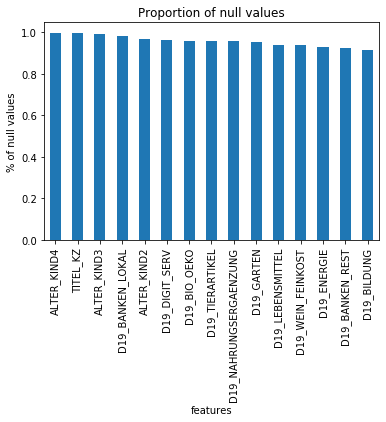

In [12]:
(azdias.isnull().sum().sort_values(ascending=False)/azdias.shape[0])[:15].plot(kind='bar')
plt.title('Proportion of null values')
plt.xlabel('features')
plt.ylabel('% of null values')

These columns can be dropped because more than 50% of the columns are NAN. We need to store these column names to apply the same concept to the customers dataframe.

In [13]:
#listing the columns which have more than 50% null values
drop_col_list=list(azdias.isnull().sum(axis=0)[azdias.isnull().sum(axis=0)>0.50*(azdias.shape[0])]\
               .reset_index()['index'])
print('Len :',len(drop_col_list))
print(drop_col_list)
azdias.drop(drop_col_list,axis=1,inplace=True)

Len : 42
['AGER_TYP', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL', 'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_DIGIT_SERV', 'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN', 'D19_HANDWERK', 'D19_HAUS_DEKO', 'D19_KINDERARTIKEL', 'D19_KOSMETIK', 'D19_LEBENSMITTEL', 'D19_LOTTO', 'D19_NAHRUNGSERGAENZUNG', 'D19_RATGEBER', 'D19_REISEN', 'D19_SAMMELARTIKEL', 'D19_SCHUHE', 'D19_SONSTIGE', 'D19_TECHNIK', 'D19_TELKO_MOBILE', 'D19_TELKO_REST', 'D19_TIERARTIKEL', 'D19_VERSAND_REST', 'D19_VERSICHERUNGEN', 'D19_VOLLSORTIMENT', 'D19_WEIN_FEINKOST', 'EXTSEL992', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'TITEL_KZ']


In [14]:
#shape of the azdias df
#42 features were removed
azdias.shape

(891221, 324)

In [15]:
#Certain values of CAMEO_INTL_2015 and CAMEO_DEUG_2015' are as follows:
azdias['CAMEO_INTL_2015'][azdias['CAMEO_INTL_2015']=='XX']

2511      XX
4569      XX
9803      XX
16700     XX
16883     XX
          ..
868148    XX
874917    XX
882189    XX
882231    XX
884998    XX
Name: CAMEO_INTL_2015, Length: 373, dtype: object

We need to replace these values with NAN value and convert CAMEO_INTL_2015 and CAMEO_DEUG_2015 into numerical entries

In [16]:
def cat_to_num(df):
    '''
    converting columns which are categorical to numerical and droping other categorical columns
    INput: 
    df: DataFrame to be processed
    
    Output:
    df: After droping and converting categorical columns
    
    '''
    
    #converting CAMEO_INTL_2015 AND CAMEO_DEUB_2015 into numerical values
    intl=[]
    deug=[]
    for i in range(len(df['CAMEO_INTL_2015'])):
        if type(df['CAMEO_INTL_2015'].iloc[i])==str and df['CAMEO_INTL_2015'].iloc[i][0]=='X':
            intl.append(np.nan)
        else:
            intl.append(float(df['CAMEO_INTL_2015'].iloc[i]))
        if type(df['CAMEO_INTL_2015'].iloc[i])==str and df['CAMEO_DEUG_2015'].iloc[i][0]=='X':
            deug.append(np.nan)
        else:
            deug.append(float(df['CAMEO_DEUG_2015'].iloc[i]))
    
    #droping the original columns
    df=df.drop(['CAMEO_INTL_2015','CAMEO_DEUG_2015'],axis=1,inplace=False)
    #Adding new columns
    df['CAMEO_INTL_2015']=intl
    df['CAMEO_DEUG_2015']=deug
    
    #droping 'LNR' AND 'VERDICHTUNGSRAUM' columns
    #droping the 'LP_FAMILIE_GROB' column because it very similar 'LP_FAMILIE_FEIN'

    df=df.drop(['LNR','VERDICHTUNGSRAUM','LP_FAMILIE_GROB'],axis=1,inplace=False)
    
    return df
    

In [17]:
azdias=cat_to_num(azdias)

Mixed Categories can be segregated into individual categories. For example, 'CAMEO_INTL_2015' can be split into 'WEALTH' and 'LIFE_CYCLE'. Similarly, we can split 'PRAEGENDE_JUGENDJAHRE' into 'MOVEMENT' AND 'GENERATION'

In [18]:
def mixed_categories(df):
    '''
    Spliting mixed attributes into individual features;
    Input:
    df: DataFrame to be processed
    
    Output:
    df
    '''
    #spliting 'CAMEO_INTL_2015' can be split into 'WEALTH' and 'LIFE_CYCLE'
    df['WEALTH']=df['CAMEO_INTL_2015'].apply(lambda x:x/10)
    df['LIFE_CYCLE']=df['CAMEO_INTL_2015'].apply(lambda x:x%10)
    
    #split 'PRAEGENDE_JUGENDJAHRE' into 'MOVEMENT' 
    mainstream=[1.0, 3.0, 5.0, 8.0, 10.0, 12.0, 14.0]
    avantgarde=[2.0, 4.0, 6.0, 7.0, 9.0, 11.0, 13.0, 15.0]
    
    main=df['PRAEGENDE_JUGENDJAHRE'].isin([1.0, 3.0, 5.0, 8.0, 10.0, 12.0, 14.0])
    avar=df['PRAEGENDE_JUGENDJAHRE'].isin([2.0, 4.0, 6.0, 7.0, 9.0, 11.0, 13.0, 15.0])
    
    df.loc[main,'MOVEMENT']=1.0
    df.loc[avar,'MOVEMENT']=2.0
    
    #Dropping the original features and categorical features which are too detailed
    df=df.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE', 'EINGEFUEGT_AM','D19_LETZTER_KAUF_BRANCHE'],axis=1,inplace=False)
    
    #Converting 'OST_WEST_KZ' into numerical values
    df['OST_WEST_KZ'] = df['OST_WEST_KZ'].replace({'O':1.0, 'W':2.0})
    
    #Getting dummies values for 'CAMEO_DEU_2015'
    new_df=pd.get_dummies(df,columns=['CAMEO_DEU_2015'])
    
    new_df=new_df.drop(['CAMEO_DEU_2015_XX'],axis=1,inplace=False)
    
    return new_df
    
    

In [19]:
azdias=mixed_categories(azdias)

# Imputing and Standardization of each column

In [20]:
azdias_col=azdias.columns

In [21]:
imputer=SimpleImputer()
scaler=StandardScaler()

In [22]:
azdias=imputer.fit_transform(azdias)
azdias_std=scaler.fit_transform(azdias)

In [23]:
azdias_transformed = pd.DataFrame(azdias_std, columns = azdias_col)

In [24]:
azdias_transformed.head()

,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
0,-2.548188e-16,1.736716e-15,-8.329672e-16,0.000000,-9.073849e-17,5.767669e-17,-6.016590e-16,1.964628e-16,1.315086e-17,-1.408128e-15,...,-0.072289,-0.250034,-0.197426,-0.189813,-0.141838,-0.1536,-0.179023,-0.16984,-0.182061,-0.084907
1,1.313451e+00,1.736716e-15,1.711386e+00,0.183431,-1.328816e-01,-3.200530e-01,2.460008e-01,3.244703e-01,-6.309721e-02,-1.774118e-01,...,-0.072289,3.999464,-0.197426,-0.189813,-0.141838,-0.1536,-0.179023,-0.16984,-0.182061,-0.084907
2,1.313451e+00,5.566920e-01,7.735480e-01,0.115813,-1.328816e-01,-3.200530e-01,-6.572095e-01,-4.419201e-02,-6.309721e-02,-1.774118e-01,...,-0.072289,-0.250034,-0.197426,-0.189813,-0.141838,-0.1536,-0.179023,-0.16984,-0.182061,-0.084907
3,-9.817530e-01,-7.468871e-01,-1.642896e-01,-0.492754,-1.328816e-01,-3.200530e-01,-1.560420e+00,-4.128543e-01,-6.309721e-02,-1.234353e+00,...,-0.072289,-0.250034,-0.197426,-0.189813,-0.141838,-0.1536,-0.179023,-0.16984,-0.182061,-0.084907
4,-9.817530e-01,1.534376e+00,7.016982e-02,-0.357517,-1.328816e-01,-3.200530e-01,2.052422e+00,-3.391219e-01,-6.309721e-02,8.795288e-01,...,-0.072289,-0.250034,-0.197426,-0.189813,-0.141838,-0.1536,-0.179023,-0.16984,-0.182061,-0.084907


In [25]:
#to free up the space
del azdias
del azdias_transformed

# PCA 

In [26]:
n_components=int((azdias_std.shape[1])/2)

pca = PCA(n_components)
azdias_pca = pca.fit_transform(azdias_std)

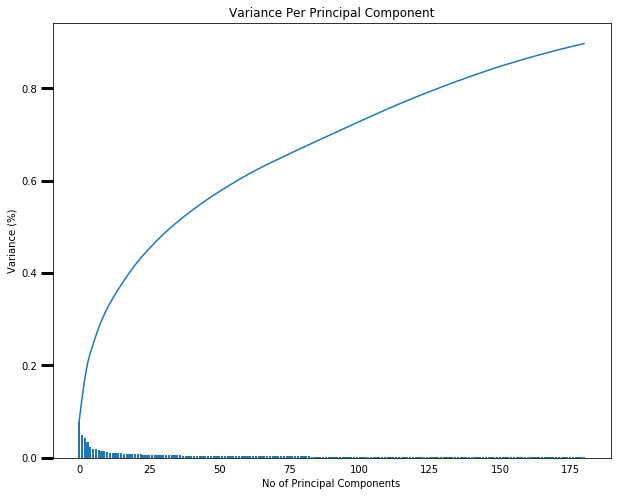

In [27]:
index=np.arange(n_components)
value=pca.explained_variance_ratio_

plt.figure(figsize=(10, 8))
ax = plt.subplot()
cum_value = np.cumsum(value)
ax.bar(index, value)
ax.plot(index, cum_value)
for i in range(n_components):
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=3, length=12)

    ax.set_xlabel("No of Principal Components")
    ax.set_ylabel("Variance (%)")
    plt.title('Variance Per Principal Component')

In [28]:
sum(pca.explained_variance_ratio_)

0.8965966362230335

In [29]:
n_components

181

In [30]:
#Converting the PCA components to the features of the clean dataset. 
#Mapping each feature to the principal components

dim =['Dimension' +str(i) for i in range(1,len(pca.components_)+1)]
comp_dist=pd.DataFrame(np.round(pca.components_,5),columns=azdias_col)
comp_dist.index=dim

In [31]:
comp_dist.head(3)

,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
Dimension1,-0.06112,0.01342,-0.01087,-0.07998,-0.01833,0.02989,0.07080,-0.07839,0.00264,-0.09403,...,-0.00316,-0.04535,-0.02799,-0.02383,-0.02191,-0.02338,-0.04239,-0.04343,-0.04309,-0.01330
Dimension2,0.01569,-0.02238,-0.01886,0.02030,0.02717,-0.01505,-0.02432,0.01958,0.01148,-0.03619,...,-0.00530,-0.00835,0.02904,-0.02554,-0.01858,-0.01086,-0.01850,0.00291,-0.00090,0.00889
Dimension3,-0.00828,0.15035,0.14288,0.00695,-0.00352,0.07783,0.07874,0.00288,-0.00247,0.00473,...,-0.00796,0.01176,0.01564,-0.00221,-0.01782,0.01571,0.01438,0.01673,0.01244,-0.02166


In [32]:
print('Principal Component 1: ')
print('Top 5 features: ')
print(comp_dist.iloc[0].sort_values(ascending=False)[:5])
print('Bottom 5 features: ')
print(comp_dist.iloc[0].sort_values(ascending=False)[-5:])
print('Variance Explained: ',pca.explained_variance_ratio_[0]*100)

Principal Component 1: 
Top 5 features: 
MOBI_REGIO     0.14437
PLZ8_ANTG1     0.14269
KBA13_ANTG1    0.14213
KBA05_ANTG1    0.13422
MOBI_RASTER    0.13274
Name: Dimension1, dtype: float64
Bottom 5 features: 
PLZ8_ANTG4     -0.13624
KBA13_BAUMAX   -0.13700
KBA13_ANTG4    -0.13775
KBA13_ANTG3    -0.14113
PLZ8_ANTG3     -0.14163
Name: Dimension1, dtype: float64
Variance Explained:  7.777650196165792


In [33]:
print('Principal Component 2: ')
print('Top 5 features: ')
print(comp_dist.iloc[1].sort_values(ascending=False)[:5])
print('Bottom 5 features: ')
print(comp_dist.iloc[1].sort_values(ascending=False)[-5:])
print('Variance Explained: ',pca.explained_variance_ratio_[1]*100)

Principal Component 2: 
Top 5 features: 
KBA13_HERST_BMW_BENZ           0.18315
KBA13_MERCEDES                 0.15690
KBA13_SEG_OBEREMITTELKLASSE    0.15629
KBA13_BMW                      0.15229
KBA13_SITZE_4                  0.14574
Name: Dimension2, dtype: float64
Bottom 5 features: 
KBA13_KMH_180          -0.12094
KBA13_HALTER_25        -0.12098
KBA13_SEG_KLEINWAGEN   -0.13142
KBA13_KMH_140_210      -0.13198
KBA13_SITZE_5          -0.15013
Name: Dimension2, dtype: float64
Variance Explained:  4.883803705757119


In [34]:
print('Principal Component 3: ')
print('Top 5 features: ')
print(comp_dist.iloc[2].sort_values(ascending=False)[:5])
print('Bottom 5 features: ')
print(comp_dist.iloc[2].sort_values(ascending=False)[-5:])
print('Variance Explained: ',pca.explained_variance_ratio_[2]*100)

Principal Component 3: 
Top 5 features: 
ONLINE_AFFINITAET     0.18171
D19_GESAMT_ANZ_24     0.16518
D19_GESAMT_ANZ_12     0.15901
D19_VERSAND_ANZ_24    0.15094
ALTER_HH              0.15035
Name: Dimension3, dtype: float64
Bottom 5 features: 
CJT_TYP_5                  -0.15228
CJT_TYP_6                  -0.15275
D19_VERSAND_ONLINE_DATUM   -0.15482
CJT_TYP_4                  -0.15493
D19_GESAMT_ONLINE_DATUM    -0.16054
Name: Dimension3, dtype: float64
Variance Explained:  4.328488378823871


In [35]:
azdias_pca.shape

(891221, 181)

After applying PCA to the azdias dataFrame, we can say that around 181 features combined give us 90% variance of the entire dataset. The first 3 components of PCA are as follows:
<br />
1) 1st Principal Component: 
<br />
The following are the top five features for this dimension:
<br />
**Feature_Name    Variance_Explained**
<br />
**MOBI_REGIO       0.14437
<br />
PLZ8_ANTG1     0.14269
<br />
KBA13_ANTG1    0.14213
<br />
KBA05_ANTG1    0.13422
<br />
MOBI_RASTER    0.13274**
<br />

The following are the bottom five features for this dimension:
<br />
**Feature_Name   Variance_Explained**
<br />
**PLZ8_ANTG4     -0.13624
<br />
KBA13_BAUMAX   -0.13700
<br />
KBA13_ANTG4    -0.13775
<br />
KBA13_ANTG3    -0.14113
<br />
PLZ8_ANTG3     -0.14163**
<br />

Total Variance explained by 1st component: **7.777**
<br />
<br />

2) 2nd Principal Component: 
<br />
The following are the top five features for this dimension:
<br />
**Feature_Name   Variance_Explained**
<br />
**KBA13_HERST_BMW_BENZ           0.18315
<br />
KBA13_MERCEDES                 0.15690
<br />
KBA13_SEG_OBEREMITTELKLASSE    0.15629
<br />
KBA13_BMW                      0.15229
<br />
KBA13_SITZE_4                  0.14574**
<br />

The following are the bottom five features for this dimension:
<br />
**Feature_Name   Variance_Explained**
<br />
**KBA13_KMH_180          -0.12094
<br />
KBA13_HALTER_25        -0.12098
<br />
KBA13_SEG_KLEINWAGEN   -0.13142
<br />
KBA13_KMH_140_210      -0.13198
<br />
KBA13_SITZE_5          -0.15013**
<br />

Total Variance explained by 2nd component: **4.88**
<br />
<br />

3) 3rd Principal Component: 
<br />
The following are the top five features for this dimension:
<br />
**Feature_Name   Variance_Explained**
<br />
**ONLINE_AFFINITAET     0.18171
<br />
D19_GESAMT_ANZ_24     0.16518
<br />
D19_GESAMT_ANZ_12     0.15901
<br />
D19_VERSAND_ANZ_24    0.15094
<br />
ALTER_HH              0.15035**
<br />

The following are the bottom five features for this dimension:
<br />
**Feature_Name   Variance_Explained**
<br />
**CJT_TYP_5                  -0.15228
<br />
CJT_TYP_6                  -0.15275
<br />
D19_VERSAND_ONLINE_DATUM   -0.15482
<br />
CJT_TYP_4                  -0.15493
<br />
D19_GESAMT_ONLINE_DATUM    -0.16054**
<br />

Total Variance explained by 3rd component: **4.32**


Text(0.5, 1.0, '1st Component Important Features')

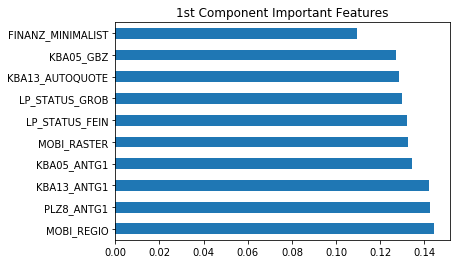

In [36]:
comp_dist.iloc[0].sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('1st Component Important Features')

Text(0.5, 1.0, '2nd Component Important Features')

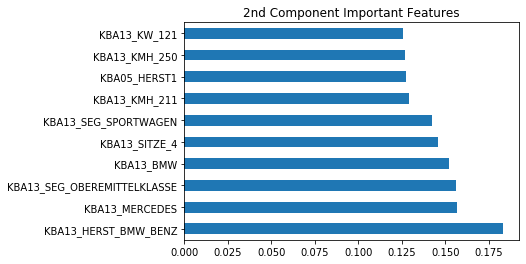

In [37]:
comp_dist.iloc[1].sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('2nd Component Important Features')

Text(0.5, 1.0, '3rd Component Important Features')

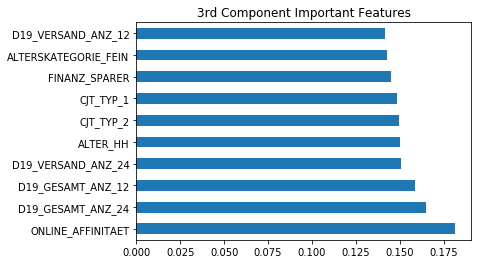

In [38]:
comp_dist.iloc[2].sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('3rd Component Important Features')

# Clustering Azdias_df

In [39]:
score=[]
centers=np.arange(10,31)

for i in centers:
    
    k_mean=MiniBatchKMeans(n_clusters=i).fit(azdias_pca)
    #Append the score with different centers
    score.append(np.abs(k_mean.score(azdias_pca)))

Text(0.5, 1.0, 'Sum of Squared distance for different no of centers')

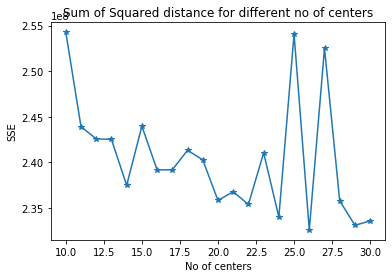

In [40]:
plt.plot(centers,score,marker='*')
plt.xlabel('No of centers')
plt.ylabel('SSE')
plt.title('Sum of Squared distance for different no of centers')

In [41]:
kmeans=KMeans(n_clusters=30)
azdias_kmeans=kmeans.fit_predict(azdias_pca)

In [42]:
azdias_cluster=pd.DataFrame(np.round(azdias_pca,5),columns=dim)
azdias_cluster.insert(loc=0,column='Cluster',value=azdias_kmeans)
azdias_cluster.head()

,Cluster,Dimension1,Dimension2,Dimension3,Dimension4,Dimension5,Dimension6,Dimension7,Dimension8,Dimension9,...,Dimension172,Dimension173,Dimension174,Dimension175,Dimension176,Dimension177,Dimension178,Dimension179,Dimension180,Dimension181
0,18,-1.04178,0.58871,-3.15077,-1.11485,0.17407,-0.24986,-0.42848,0.27544,-0.50469,...,-0.07035,0.29813,-0.21065,-0.03691,0.13218,-0.65724,-0.00249,0.52578,-0.11475,-0.34372
1,10,-4.15687,5.35438,4.01152,-5.78297,0.48602,3.35851,-3.79806,0.55148,0.25724,...,0.82020,1.72936,0.45499,1.80383,-0.18647,-0.90231,-0.36160,-0.98212,0.52897,-0.00627
2,10,0.83112,3.05910,-1.28712,-3.05368,4.92575,-6.23848,-0.40428,-2.37724,1.68691,...,0.29167,-0.32074,0.95799,0.07334,0.72929,-1.67464,0.43412,-0.81930,-0.31685,0.17755
3,6,5.34641,1.33627,-5.04786,-2.72614,-0.95219,1.15366,-1.43715,-1.43915,-2.63119,...,1.31016,0.46078,-0.74997,0.85980,-0.72648,0.75737,-0.83764,0.01254,0.16385,0.81328
4,4,4.00906,0.64782,10.07008,8.03038,-3.88574,-0.75032,3.37291,-3.33328,-0.21968,...,0.57308,1.84820,1.14827,0.03908,0.46469,-1.22436,-0.96740,-1.41989,0.32635,0.42594


In [43]:
del azdias_pca
del azdias_kmeans

# Applying these changes to the customer_dataset

In [86]:
#Data loading
customers = pd.read_csv('../capstone_data/Udacity_CUSTOMERS_052018.csv',low_memory=False)
customers=customers.drop(['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'], axis=1)

In [87]:
#CLeaning Customers
customers=Map_unknown_to_NAN(customers,attribute_dict)
customers.drop(drop_col_list,axis=1,inplace=True)
customers=cat_to_num(customers)
customers=mixed_categories(customers)

In [88]:
#customers col
customers_col=customers.columns

In [89]:
#Imputing and standardization
customers_imp=imputer.transform(customers)
customers_std=scaler.transform(customers_imp)

In [90]:
#Checking that both have same columns: 
sum(customers_col==azdias_col)#should be equal to 363 (features after cleaning)

363

In [91]:
#Applying PCA and Kmeans to customers
customers_pca=pca.transform(customers_std)
customers_kmeans=kmeans.predict(customers_pca)

In [92]:
customers_cluster=pd.DataFrame(np.round(customers_pca,5),columns=dim)
customers_cluster.insert(loc=0,column='Cluster',value=customers_kmeans)
customers_cluster.head()

,Cluster,Dimension1,Dimension2,Dimension3,Dimension4,Dimension5,Dimension6,Dimension7,Dimension8,Dimension9,...,Dimension172,Dimension173,Dimension174,Dimension175,Dimension176,Dimension177,Dimension178,Dimension179,Dimension180,Dimension181
0,14,9.02956,4.87175,-5.61411,0.59315,-1.80790,1.17033,3.29900,0.08127,0.42136,...,0.78375,-0.58245,-0.05235,0.57477,0.96755,-1.82512,-0.43305,0.91537,-0.46941,-0.06720
1,2,0.46258,0.12217,-2.01479,1.03823,-0.58869,1.22670,2.03171,-0.15923,0.48895,...,0.46515,-1.01150,0.47470,-0.00549,-0.48848,-0.66910,0.55615,-0.01970,0.32200,0.31864
2,14,-1.40998,4.98346,-6.17379,3.67699,-4.18002,-1.55015,-0.22726,3.26509,-6.51253,...,-0.66085,-0.26779,0.46460,-1.05538,-0.18795,0.60758,-0.64739,-0.02357,-1.59881,-1.51272
3,1,6.01955,-1.02787,-5.36253,1.56776,3.11829,2.76672,2.48127,-4.58007,-0.33909,...,0.40834,1.12257,0.65208,-0.39258,-0.12079,-0.26736,0.95065,-0.60683,-0.88102,-1.73546
4,24,0.26362,-2.80163,6.85669,4.02312,-5.35450,-0.58757,0.77423,-0.08227,2.75867,...,0.06369,-0.32905,0.05148,-0.22980,0.82805,0.46501,-0.00889,-0.06480,-0.25121,0.85656


In [93]:
del customers_pca
del customers_kmeans

# Customer Segmentation

In [94]:
#Creating a df from the difference of both the clusters
temp=(azdias_cluster['Cluster'].value_counts()/azdias_cluster.shape[0]).reset_index().sort_values(by=['index'])
azdias_count=np.array(temp['Cluster'])
cust_temp=(customers_cluster['Cluster'].value_counts()/customers_cluster.shape[0]).reset_index().sort_values(by=['index'])
customers_count=np.array(cust_temp['Cluster'])

Text(0, 0.5, 'Proportion')

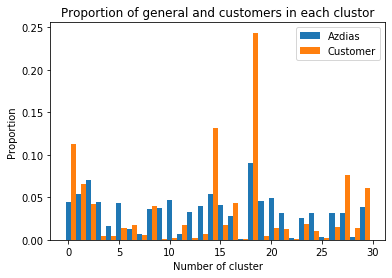

In [95]:
#PLotting graph
x_range=temp['index']
bar_width=0.5

fig,ax =plt.subplots()

ax.bar(x_range,azdias_count,bar_width,label='Azdias')
ax.bar(x_range+bar_width,customers_count,bar_width,label='Customer')
plt.legend()
plt.title('Proportion of general and customers in each clustor')
plt.xlabel('Number of cluster')
plt.ylabel('Proportion')

In [96]:
diff_count=customers_count-azdias_count

Text(0, 0.5, 'Diff in Proportion')

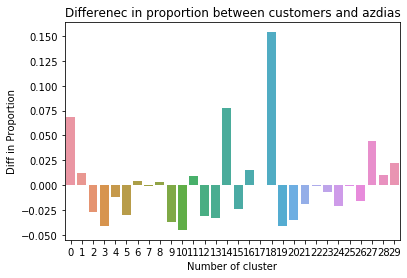

In [97]:
#Creating df from difference of both clusters
diff_count=pd.DataFrame(diff_count,columns=['Count'])

sns.barplot(diff_count.index,diff_count['Count'])
plt.title('Difference in proportion between customers and azdias')
plt.xlabel('Number of cluster')
plt.ylabel('Diff in Proportion')

# Conclusion

Based on the results, the general population(azdias) under cluster number #18, #14 and #0 seems to be a good suggestion for potential future customers. The population under cluster number #10, #3, #20 and #9 seems be considered as non target for the mail order company.